
getting state GeoDataFrame
Sucessfully loaded state GeoDataFrame
getting state partition
generating map
Map with Efficiency-Gap metric 0.08301093828304769 found: 
Population in each district:
District
0     726505
1     724545
2     725720
3     721665
4     721895
5     723215
6     730080
7     725395
8     725730
9     724810
10    720550
11    724675
12    723900
13    722640
Name: C_TOT22, dtype: int32


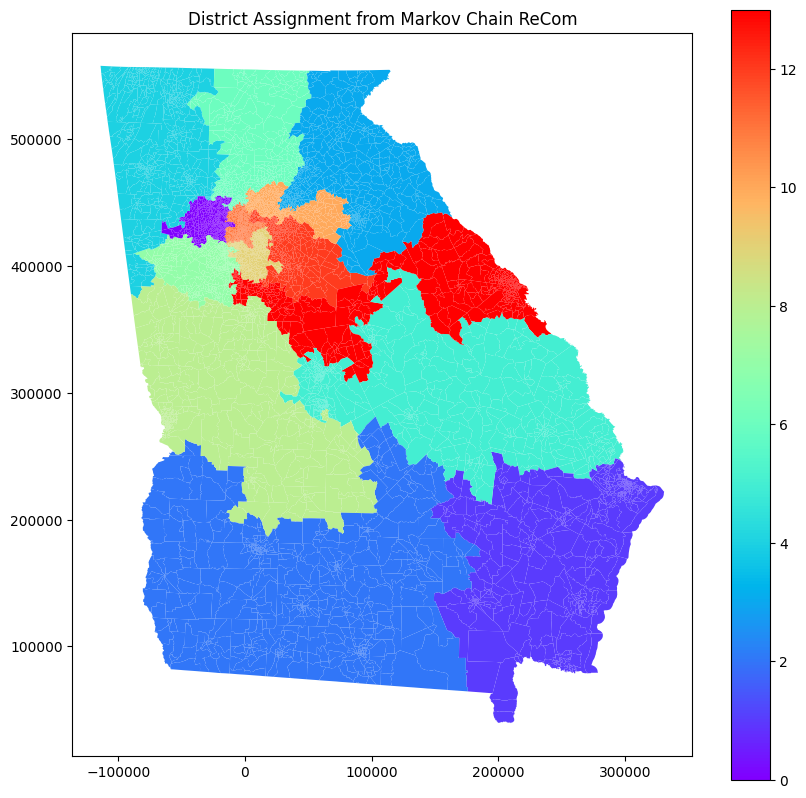

Dissolving maps...
Maps dissolved.


In [1]:
from fairymander.generator import DistrictGenerator

my_generator = DistrictGenerator("ga", 0.008, 10, 3, "competitiveness")

"""
Running this will save as the following file structure in the current directory, creating the directory if it doesnt exist:

my_districts
    |
    |-testing_ga
        |
        |-testing_ga-0
        |-testing_ga-1
        |-testing_ga-2

Where the final "prefix-index" folders will have all the .shp related files
"""
# districts = my_generator.run_and_save(directory="my_districts", file_prefix="testing-ga")

districts = my_generator.run() # note, now returns the maps dissolved


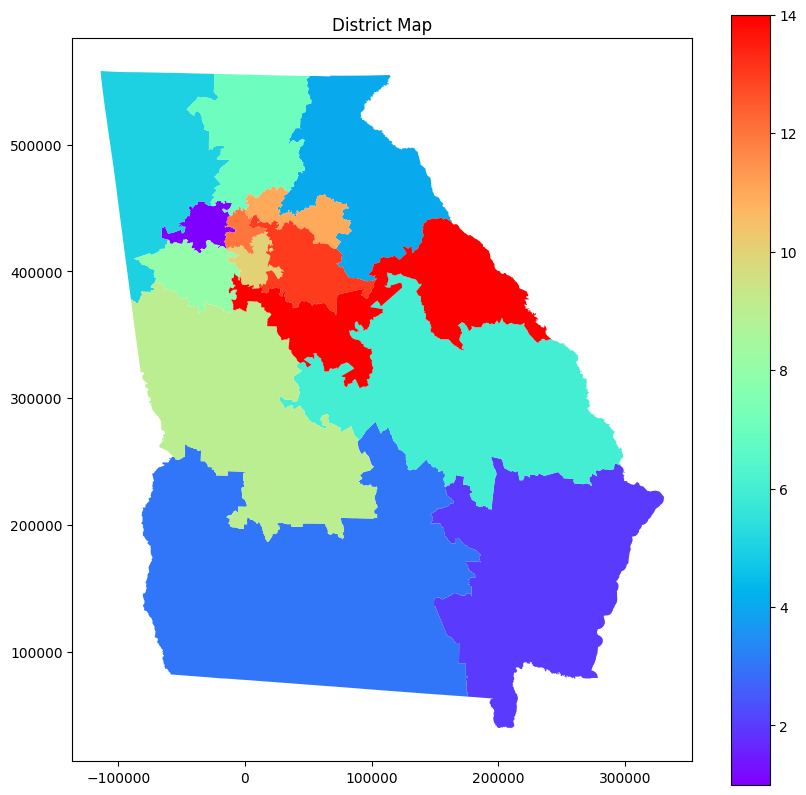

Running Fairness Analysis
-------------------------
Average Polsby-Popper Score: 0.16806459692656034

Average Reock Score: 0.42471952080167863

Efficiency Gap: -8.301241167737693

Mean Median Difference: 0.3046046379497902

Lobsided Margin Score: -1.024603329797415

Dissimilarity index, Hispanic: 0.1774494959944296
Dissimilarity index, African American: 0.3147534264355071
Dissimilarity index, East and South Asian: 0.36745258483303345
Dissimilarity index, Other: 0.2815569003811841



In [2]:
from fairymander.fairness import full_analysis, compare_maps

gdf = districts[0]

full_analysis(gdf)


In [3]:
compare_maps(districts[1], districts[2])

IndexError: list index out of range

: 

    District C_TOT22 Deviation  party_dem  party_rep  party_oth Total VAP  \
0          1  765137         0     242365     337531       9369    589266   
1          2  765137         0     313460     267807       6345    587555   
2          3  765136         0     191726     384683       9908    586319   
3          4  765137         0     449218     124109       9618    582946   
4          5  765137         0     522595      81197       9942    613735   
5          6  765136         0     431850     151984       9855    593690   
6          7  765137         0     210473     356293      12571    579339   
7          8  765136         0     197375     381158       7323    585857   
8          9  765135         0     178322     393241      11188    582752   
9         10  765137         0     219363     361040       9917    590322   
10        11  765135         0     209248     365890      13961    589100   
11        12  765136         0     248539     331757       7880    588119   

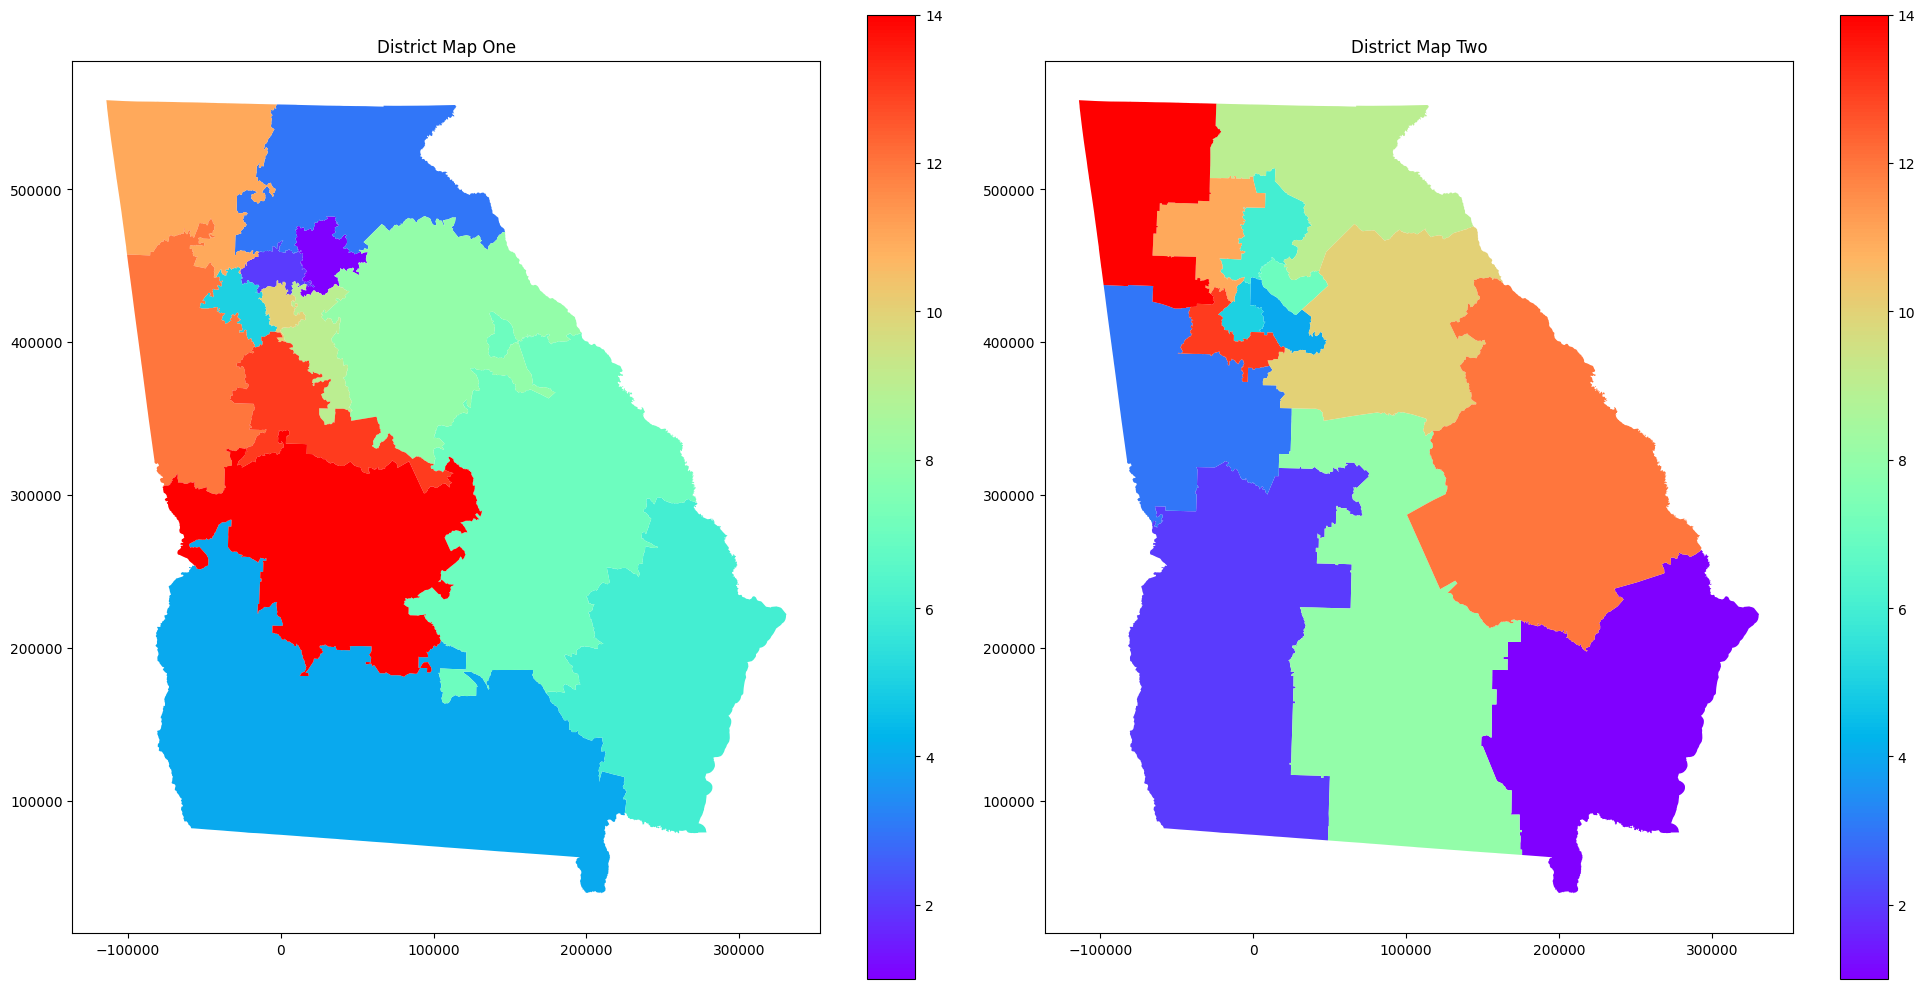

Running Fairness Comparison Analysis
------------------------------------
Average Polsby-Popper Score for Map 1: 0.15759776749812077
Average Polsby-Popper Score for Map 2: 0.2670441295533427
Map Two has a better Polsby-Popper score

Average Reock Score for Map 1: 0.43921314428989694
Average Reock Score for Map 2: 0.444251266154082
Map Two has a better Reock score

Efficiency Gap for Map 1: 15.323939347526421
Efficiency Gap for Map 2: 12.449005271048282
Map Two has a better Efficiency Gap

Mean Median Difference, Map One: 9.538037784899217
Mean Median Difference, Map Two: 9.402376574209232
Map Two has a better Mean Median Difference

Lobsided Margin Score, Map One: 9.227270347240633
Lobsided Margin Score, Map Two: 8.567617694916407
Map Two has a better Lobsided Margin Score

Dissimilarity index, Hispanic, for Map One: 0.3210809234300456
Dissimilarity index, African American, for Map One: 0.7977534801099088
Dissimilarity index, East and South Asian, for Map One: 0.2746338982964229
Dissim

In [7]:
from fairymander.data import get_curr_district_file

gdf = get_curr_district_file('ga')
print(gdf)
compare_maps(districts[0], gdf)


In [6]:
from fairymander.folium_converter import map_to_folium

res = map_to_folium('ga', districts[0])

res